<a href="https://colab.research.google.com/github/aaronjoel/DeepUnderstandingOfDeepLearning/blob/main/DUDL_FFN_CodeChallenge_BinMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as mb
mb.set_matplotlib_formats('svg')

In [2]:
# Import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:, 0]
data   = data[:, 1:]

In [3]:
labels.shape, data.shape

((20000,), (20000, 784))

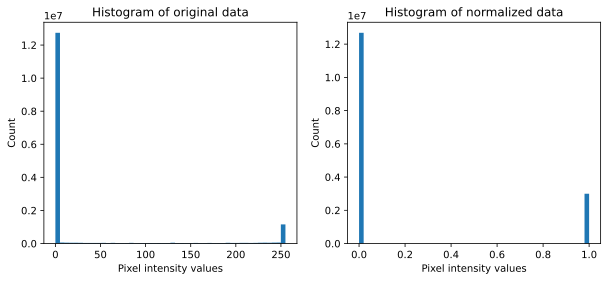

In [6]:
# normalize the data to 0 or 1
dataNorm = (data > 0).astype(float)
#dataNorm = data / (data.max() - data.min())

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')

ax[1].hist(dataNorm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

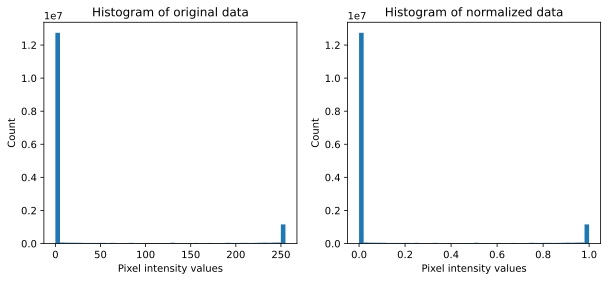

In [7]:
#dataNorm = (data > 0).astype(float)
dataNorm = data / (data.max() - data.min())

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')

ax[1].hist(dataNorm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

In [8]:
# Confirm that the data have limited values
print(f"np.unique(data):\n{np.unique(data)}")
print("")
print(f"np.unique(dataNorm):\n{np.unique(dataNorm)}")


np.unique(data):
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193.

In [9]:
# Step 1: convert to tensor
dataT = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long()

# Step 2: use scikit-learn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    dataT,
    labelsT,
    test_size=.15,
    random_state=42
)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data  = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [10]:
# Create a class for the model
class mnistNet(nn.Module):

  def __init__(self):
    super().__init__()

    ## input layer
    self.input = nn.Linear(in_features=784, out_features=64)

    ## hidden layer
    self.fc1 = nn.Linear(in_features=64, out_features=32)
    self.fc2 = nn.Linear(in_features=32, out_features=32)

    ## output layer
    self.output = nn.Linear(in_features=32, out_features=10)

  # forward pass
  def forward(self, x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) )
    x = F.relu( self.fc2(x) )
    return torch.log_softmax( self.output(x), axis=1)

def createTheMNISTNet():

  net = mnistNet()

  # loss function
  loss = nn.NLLLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(), lr=.01)

  return net, loss, optimizer

In [11]:
# test the model with one batch
net, lossfun, optimzer = createTheMNISTNet()

X, y = next(iter(train_loader))
yHat = net(X)

# confirm really binary
torch.unique(X)

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

In [12]:
def function2trainTheModel(num_epochs=60):

  # create a new model
  net, lossfun, optimizer = createTheMNISTNet()

  # store the losses
  losses = torch.zeros(num_epochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for i in range(num_epochs):
    # loop over training data batches
    batchAcc = []
    batchLoss = []
    for X, y in train_loader:
      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat, axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()              # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
      batchAcc.append( accuracyPct )                # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[i] = np.mean(batchLoss)

    # test accuracy
    X, y = next(iter(test_loader)) # extract X, y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy
    testAcc.append( 100*torch.mean((torch.argmax(yHat, axis=1) == y).float()) )

  # end epochs

  # function output
  return trainAcc, testAcc, losses, net

In [13]:
trainAcc, testAcc, losses, net = function2trainTheModel()

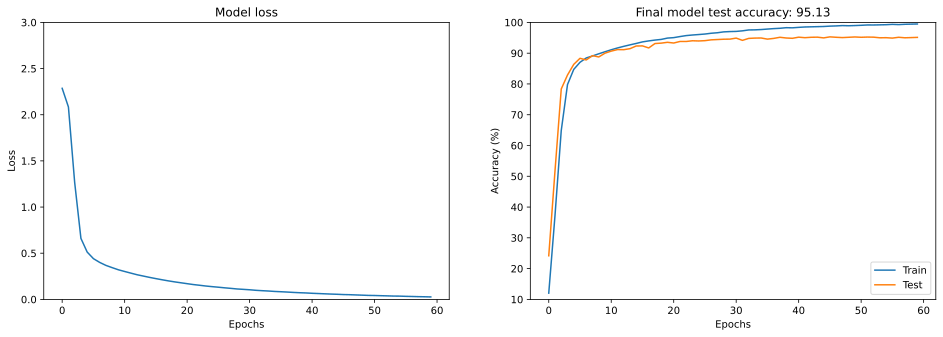

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0, 3])
ax[0].set_title('Model loss')


ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10, 100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}')
ax[1].legend()

plt.show()

In [15]:
X, y = next(iter(test_loader))
predictions = net(X).detach()

In [16]:
predictions[:10]

tensor([[-2.1882e+01, -3.3407e+01, -2.6896e+01, -2.0025e+01, -1.4122e+01,
         -2.1908e+01, -3.0911e+01, -1.9096e+01, -1.3644e+01, -1.9073e-06],
        [-1.6430e+01, -1.7024e+01, -2.5548e+01, -1.6228e+01, -1.3539e+01,
         -1.9073e-05, -1.4715e+01, -2.1536e+01, -1.0977e+01, -1.9675e+01],
        [-1.7679e+01, -9.8531e+00, -6.5231e-03, -6.6957e+00, -1.3250e+01,
         -2.6407e+01, -1.8343e+01, -5.2936e+00, -8.5827e+00, -1.5547e+01],
        [-1.5212e+01, -1.3305e+01, -1.5706e+01, -1.7232e+01, -9.4211e+00,
         -9.7179e+00, -2.1289e-04, -2.9790e+01, -9.5723e+00, -1.9237e+01],
        [-1.4416e+01, -2.3921e+01, -1.4834e+01, -2.4104e+01, -1.4753e+01,
         -1.8498e+01, -1.4305e-06, -3.7111e+01, -1.5664e+01, -2.3002e+01],
        [-9.2869e-04, -2.4791e+01, -9.0924e+00, -9.6188e+00, -1.2930e+01,
         -1.1900e+01, -1.8606e+01, -8.4795e+00, -1.3566e+01, -7.5407e+00],
        [-4.6610e-05, -3.1216e+01, -1.3335e+01, -1.5280e+01, -1.7777e+01,
         -1.3229e+01, -1.4412e+0

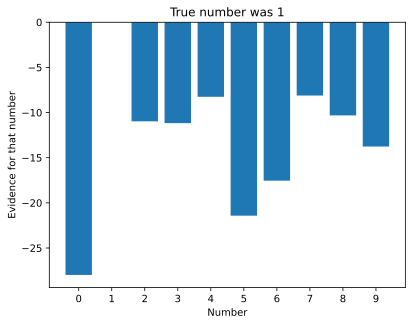

In [17]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10), predictions[sample2show]) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' % y[sample2show].item())
plt.show()

<ipython-input-18-27d9f47779eb>:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.bar(range(10), np.exp(predictions[sample2show])) # try adding exp!


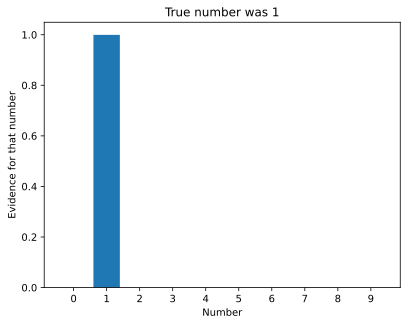

In [18]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10), np.exp(predictions[sample2show])) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' % y[sample2show].item())
plt.show()

In [19]:
# find the errors
errors = np.where( torch.max(predictions, axis=1)[1] != y)[0]
print(errors)

[   9   33   35   44   52   64   98  104  124  166  192  198  211  214
  216  240  281  287  350  397  428  443  462  518  554  571  584  600
  614  623  640  641  653  666  714  716  723  729  736  743  744  783
  790  830  835  837  868  884  886  911  933  940  941  970  988  996
 1016 1029 1032 1169 1171 1205 1211 1213 1237 1259 1287 1339 1397 1438
 1445 1460 1467 1476 1511 1551 1558 1602 1619 1641 1652 1683 1686 1718
 1728 1734 1770 1823 1832 1863 1891 1898 1961 1981 2009 2042 2097 2118
 2138 2145 2165 2171 2212 2245 2256 2258 2278 2333 2365 2378 2388 2391
 2406 2428 2438 2455 2494 2529 2537 2546 2564 2566 2567 2595 2632 2658
 2659 2697 2711 2722 2724 2755 2775 2849 2855 2880 2885 2902 2911 2913
 2921 2926 2935 2952 2958 2991]


<ipython-input-20-772d7bb3032c>:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[0].bar(range(10), np.exp(predictions[sample2show]))


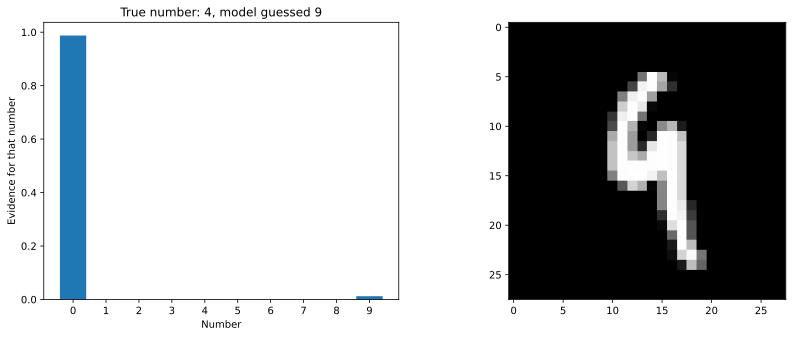

In [20]:
# Evidence for all numbers from one sample
sample2show = 14

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(range(10), np.exp(predictions[sample2show]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s'
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()

In [21]:
# 1) Invert the images so that the numbers are black against a white background. It seems intuitive that the
#    model should perform just as well, but it's good to confirm. This is also a useful exercise to learn how
#    to invert images, which will become useful when learning about augmenting image datasets.
#

In [24]:
# Import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:, 0]
data   = data[:, 1:]

In [26]:
# Let me invert the data
dataN = data / (data.max() - data.min())
dataN = 1 - dataN
dataN

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

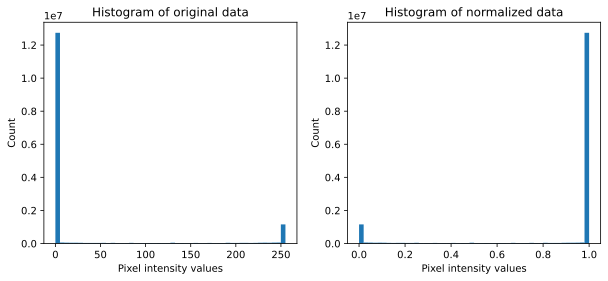

In [27]:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')

ax[1].hist(dataN.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

In [28]:
# Step 1: convert to tensor
dataT = torch.tensor( dataN ).float()
labelsT = torch.tensor( labels ).long()

# Step 2: use scikit-learn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    dataT,
    labelsT,
    test_size=.15,
    random_state=42
)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data  = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [29]:
trainAcc, testAcc, losses, net = function2trainTheModel()

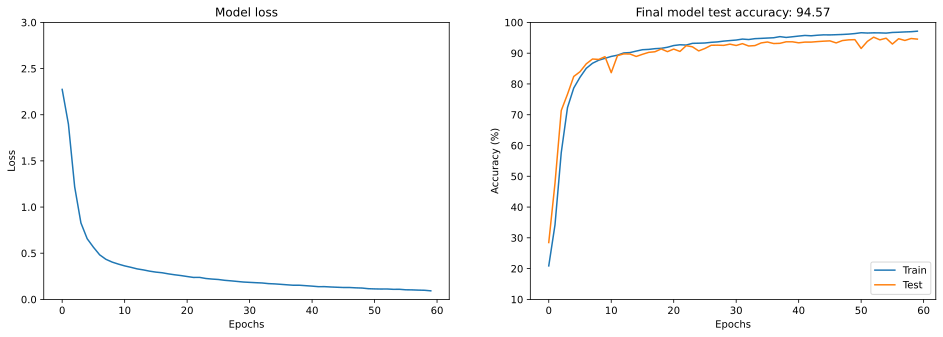

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0, 3])
ax[0].set_title('Model loss')


ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10, 100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}')
ax[1].legend()

plt.show()

In [31]:
X, y = next(iter(test_loader))
predictions = net(X).detach()

In [32]:
predictions[:10]

tensor([[-1.8621e+01, -2.4053e+01, -1.0962e+01, -8.7659e+00, -1.1705e+01,
         -1.4032e+01, -3.0172e+01, -9.0376e+00, -5.8613e+00, -3.1538e-03],
        [-1.3947e+01, -8.3455e+00, -1.3190e+01, -1.0677e+01, -1.1924e+01,
         -3.1204e-04, -1.0950e+01, -1.2732e+01, -1.0746e+01, -1.6581e+01],
        [-1.1045e+01, -1.8903e+01, -2.9361e-02, -3.8061e+00, -9.9989e+00,
         -1.4149e+01, -1.5127e+01, -9.5110e+00, -5.0304e+00, -1.0502e+01],
        [-1.3922e+01, -9.9699e+00, -6.4637e+00, -1.3766e+01, -1.1061e+01,
         -8.5692e+00, -1.8196e-03, -1.3739e+01, -1.2549e+01, -2.3243e+01],
        [-9.7680e+00, -1.7415e+01, -8.1691e+00, -1.5764e+01, -1.0951e+01,
         -1.1189e+01, -3.7306e-04, -1.8144e+01, -1.3933e+01, -2.1923e+01],
        [-1.9513e-03, -2.4684e+01, -6.8168e+00, -1.0362e+01, -1.5513e+01,
         -1.0174e+01, -1.6415e+01, -8.4925e+00, -1.5095e+01, -7.4544e+00],
        [-1.0259e-03, -2.3923e+01, -7.7980e+00, -1.1016e+01, -1.2864e+01,
         -1.1392e+01, -1.2299e+0

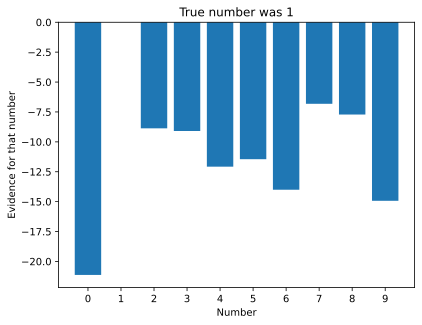

In [33]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10), predictions[sample2show]) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' % y[sample2show].item())
plt.show()

<ipython-input-34-27d9f47779eb>:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.bar(range(10), np.exp(predictions[sample2show])) # try adding exp!


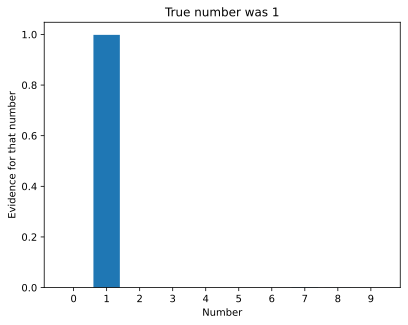

In [34]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10), np.exp(predictions[sample2show])) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' % y[sample2show].item())
plt.show()

In [35]:
# find the errors
errors = np.where( torch.max(predictions, axis=1)[1] != y)[0]
print(errors)

[   9   22   44   79   98  104  108  152  176  192  216  228  240  241
  281  295  336  380  397  428  435  443  461  462  492  494  518  554
  566  571  584  590  600  640  641  649  659  666  695  714  716  723
  736  743  744  748  790  835  837  886  911  940  941  970  988  996
 1016 1024 1028 1029 1032 1045 1088 1205 1211 1213 1237 1259 1325 1339
 1397 1403 1430 1438 1439 1453 1459 1467 1476 1490 1511 1551 1555 1558
 1560 1622 1641 1652 1683 1686 1728 1734 1770 1774 1814 1816 1824 1832
 1836 1841 1863 1891 1904 1941 1961 1981 2007 2009 2017 2044 2050 2094
 2113 2138 2145 2165 2171 2212 2214 2253 2258 2295 2333 2378 2386 2388
 2423 2438 2444 2455 2494 2546 2566 2589 2603 2607 2629 2632 2655 2659
 2673 2679 2717 2722 2724 2744 2755 2775 2782 2819 2839 2849 2850 2885
 2902 2911 2913 2926 2935 2940 2952 2958 2991]


<ipython-input-36-772d7bb3032c>:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[0].bar(range(10), np.exp(predictions[sample2show]))


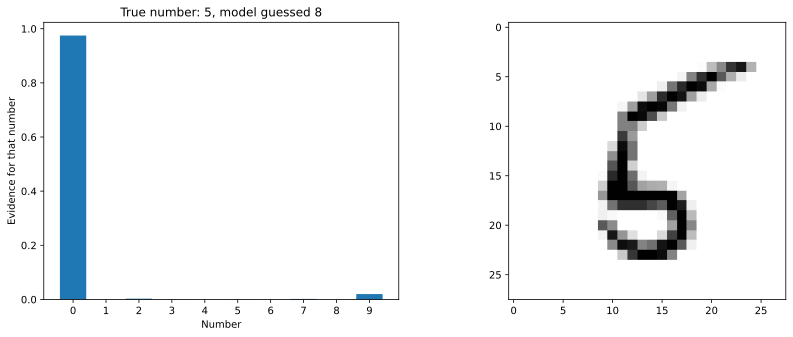

In [36]:
# Evidence for all numbers from one sample
sample2show = 14

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(range(10), np.exp(predictions[sample2show]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s'
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()